# **Análise das Emissões de CO2 no Brasil - Projeções Futuras**

## **Apresentação**
Este notebook tem como objetivo analisar a evolução das emissões de dióxido de carbono (CO2) no Brasil nas últimas décadas e prever os níveis de emissões para os próximos 10 anos. A partir de um conjunto de dados global, aplicamos ferramentas de análise de dados e aprendizado de máquina para identificar tendências e projetar possíveis cenários futuros.

## **Participantes do Projeto**
- **Gustavo Cristiano Pessoa de Souza** - RM: 551924
- **Gustavo Medeiros Miranda da Silva** - RM: 552093
- **Vinicius do Carmo Fonseca Freitas** - RM: 97599

## **Etapas do Projeto**
1. **Análise Exploratória**: Entender os dados históricos de emissões de CO2 no Brasil e identificar padrões.
2. **Comparação Internacional**: Avaliar como o Brasil se compara a outros países em emissões per capita.
3. **Modelagem Preditiva**: Utilizar regressão linear para prever emissões futuras até o ano de 2030.
4. **Visualização de Resultados**: Criar gráficos informativos para comunicar as descobertas.

Este projeto combina ciência de dados e machine learning para fornecer insights úteis sobre a sustentabilidade ambiental do Brasil.

## **Dataset escolhido**

O dataset utilizado neste projeto foi o conjunto de dados global de emissões de CO2 disponível no repositório da Our World in Data (OWID), acessível através do [link aqui](https://github.com/owid/co2-data). Este conjunto de dados é amplamente reconhecido e utilizado por sua abrangência e precisão, cobrindo informações detalhadas sobre as emissões de dióxido de carbono de diversos países ao longo de várias décadas. Com dados atualizados e consistentes, o OWID oferece uma visão clara das tendências globais e regionais de emissões, sendo uma base sólida para análises ambientais. Ao escolher esse dataset, garantimos uma análise robusta e representativa, permitindo compreender melhor o comportamento das emissões de CO2 no Brasil em comparação com outros países.

[GitHub OWID CO2 Data](https://github.com/owid/co2-data)

# **1. Importação de Bibliotecas e Configuração**

Importamos as bibliotecas necessárias e ajustamos o estilo dos gráficos.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid")  # Configuração de estilo para gráficos



# **2. Carregamento e Limpeza de Dados**

Carregamos os dados da base Our World in Data e filtramos as colunas relevantes, além de tratar valores ausentes.

In [22]:
# Carregar e inspecionar dados, dataset carregado diretamente da web
data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv')
columns_of_interest = ['country', 'year', 'co2', 'co2_per_capita', 'population', 'gdp']
data = data[columns_of_interest]
data = data.dropna(subset=['co2', 'co2_per_capita'])  # Remover linhas com valores ausentes

# **3. Evolução das Emissões no Brasil**

Filtramos os dados do Brasil a partir de 2000 e criamos um gráfico da evolução das emissões totais e per capita.

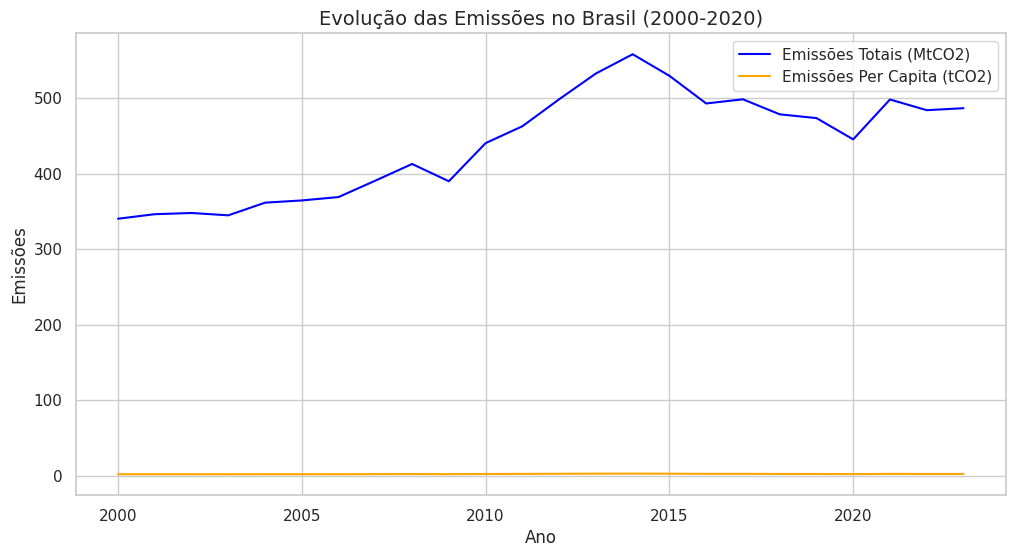

In [21]:
# Filtrar dados do Brasil
brazil_data = data[(data['country'] == 'Brazil') & (data['year'] >= 2000)]

# Gráfico de evolução
plt.figure(figsize=(12, 6))
plt.plot(brazil_data['year'], brazil_data['co2'], label='Emissões Totais (MtCO2)', color='blue')
plt.plot(brazil_data['year'], brazil_data['co2_per_capita'], label='Emissões Per Capita (tCO2)', color='orange')
plt.title('Evolução das Emissões no Brasil (2000-2020)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Emissões')
plt.legend()
plt.grid(True)
plt.show()

# **4. Comparação Internacional**

Comparamos as emissões per capita do Brasil com os EUA, China, Japão e Rússia.

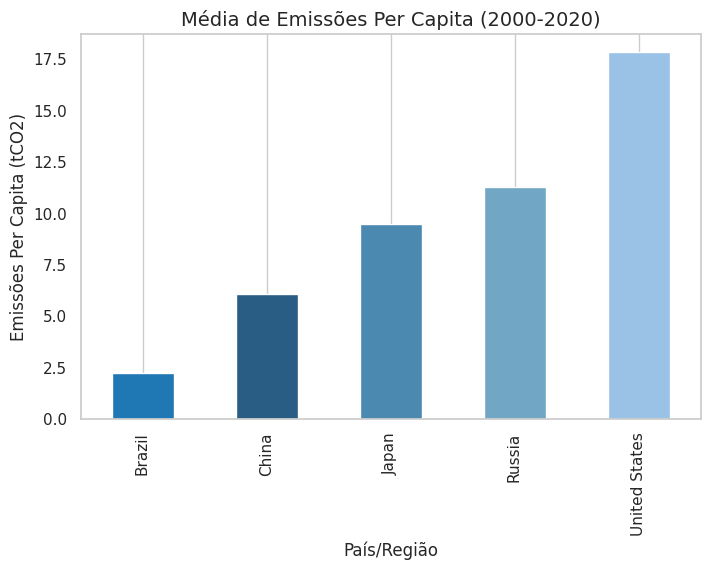

In [35]:
# Filtrar países de interesse
countries = ['Brazil','United States','China','Japan','Russia']
comparison_data = data[(data['country'].isin(countries)) & (data['year'] >= 2000)]

# Média de emissões per capita
mean_emissions = comparison_data.groupby('country')['co2_per_capita'].mean()

# Gráfico de barras
plt.figure(figsize=(8, 5))
mean_emissions.plot(kind='bar', color=['#1f77b4', '#2a5d84', '#4c89b0', '#71a7c4', '#99c2e6'])
plt.title('Média de Emissões Per Capita (2000-2020)', fontsize=14)
plt.xlabel('País/Região')
plt.ylabel('Emissões Per Capita (tCO2)')
plt.grid(axis='y')
plt.show()

# **5. Previsão de Emissões no Brasil**

Usamos regressão linear para prever emissões futuras com base em dados históricos.

Erro quadrático médio (MSE): 271.98


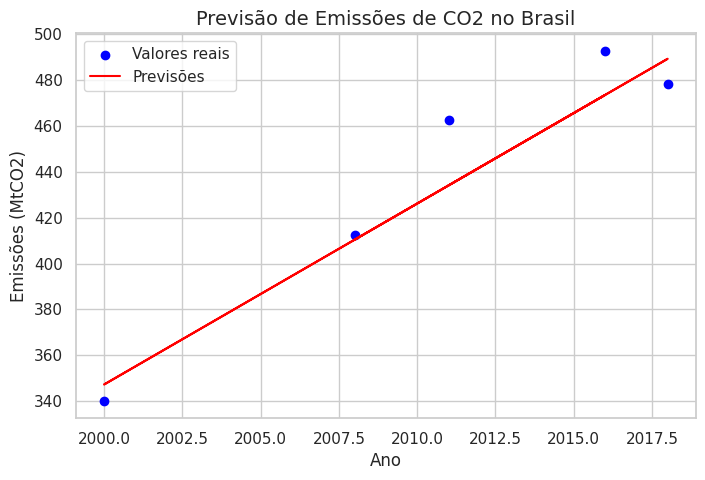

In [12]:
# Preparar os dados
X = brazil_data[['year']]
y = brazil_data['co2']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Erro quadrático médio (MSE): {mse:.2f}")

# Gráfico de previsão
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Valores reais')
plt.plot(X_test, y_pred, color='red', label='Previsões')
plt.title('Previsão de Emissões de CO2 no Brasil', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Emissões (MtCO2)')
plt.legend()
plt.grid(True)
plt.show()

# **6. Previsão das Emissões de CO2 no Brasil para os Próximos 10 Anos**

Neste trecho de código, utilizamos o modelo de **Regressão Linear** para prever as emissões de CO2 no Brasil para os próximos 10 anos (2021–2030). A previsão é baseada nas emissões históricas de CO2 desde o ano 2000.

   Year  Predicted_CO2
0  2021     512.918485
1  2022     520.807173
2  2023     528.695862
3  2024     536.584551
4  2025     544.473239
5  2026     552.361928
6  2027     560.250617
7  2028     568.139305
8  2029     576.027994
9  2030     583.916683


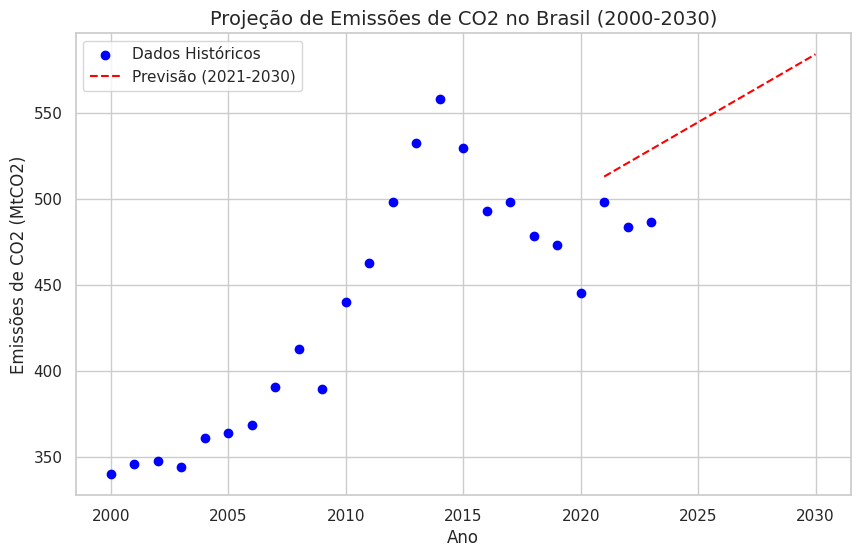

In [13]:
# Separar variáveis dependente (y) e independente (X)
X = brazil_data[['year']]
y = brazil_data['co2']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Criar anos futuros para previsão
future_years = pd.DataFrame({'year': np.arange(2021, 2031)})

# Prever emissões futuras
future_predictions = model.predict(future_years)

# Criar DataFrame com previsões
future_results = pd.DataFrame({
    'Year': future_years['year'],
    'Predicted_CO2': future_predictions
})

# Mostrar previsões
print(future_results)

# Plotar os dados e a projeção
plt.figure(figsize=(10, 6))
plt.scatter(brazil_data['year'], brazil_data['co2'], label='Dados Históricos', color='blue')
plt.plot(future_results['Year'], future_results['Predicted_CO2'], label='Previsão (2021-2030)', color='red', linestyle='--')
plt.title('Projeção de Emissões de CO2 no Brasil (2000-2030)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões de CO2 (MtCO2)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# **7. Total de Emissões de CO2 no Brasil por Ano**

Vamos somar as emissões de CO2 para o Brasil por ano, verificando se há algum aumento ou diminuição total das emissões ao longo dos anos.

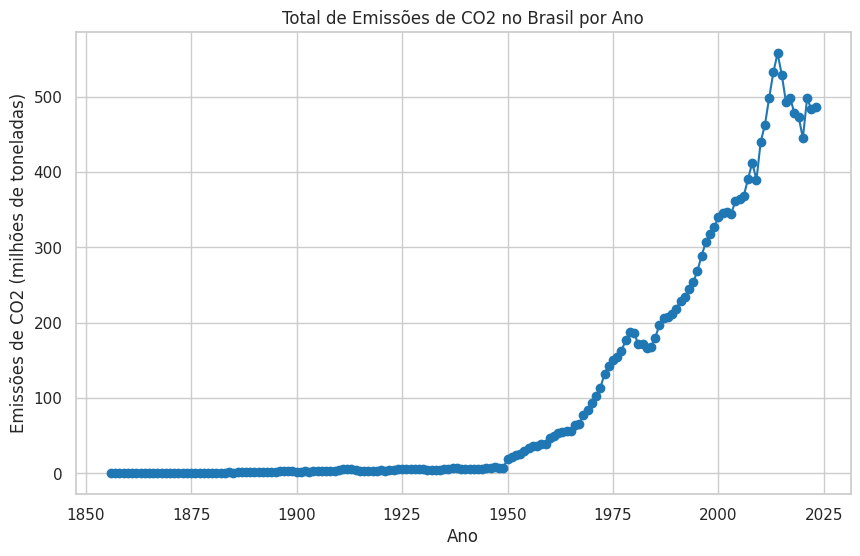

In [33]:
# Filtrar os dados para o Brasil
df_brasil = data[data['country'] == 'Brazil']

# Agrupar os dados por ano e somar as emissões de CO2
emissoes_ano = df_brasil.groupby('year')['co2'].sum()

# Plotar as emissões totais de CO2 no Brasil por ano
plt.figure(figsize=(10, 6))
plt.plot(emissoes_ano.index, emissoes_ano.values, marker='o', color='tab:blue')
plt.title('Total de Emissões de CO2 no Brasil por Ano')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (milhões de toneladas)')
plt.grid(True)
plt.show()

# **8. Comparação das Emissões de CO2 de Mundial e dos 4 Países com Maior Emissão em 2021**

Comparar os 4 países que mais emitiram CO2 em 2021 e compará-los em um gráfico de barras com o número de emissão global.

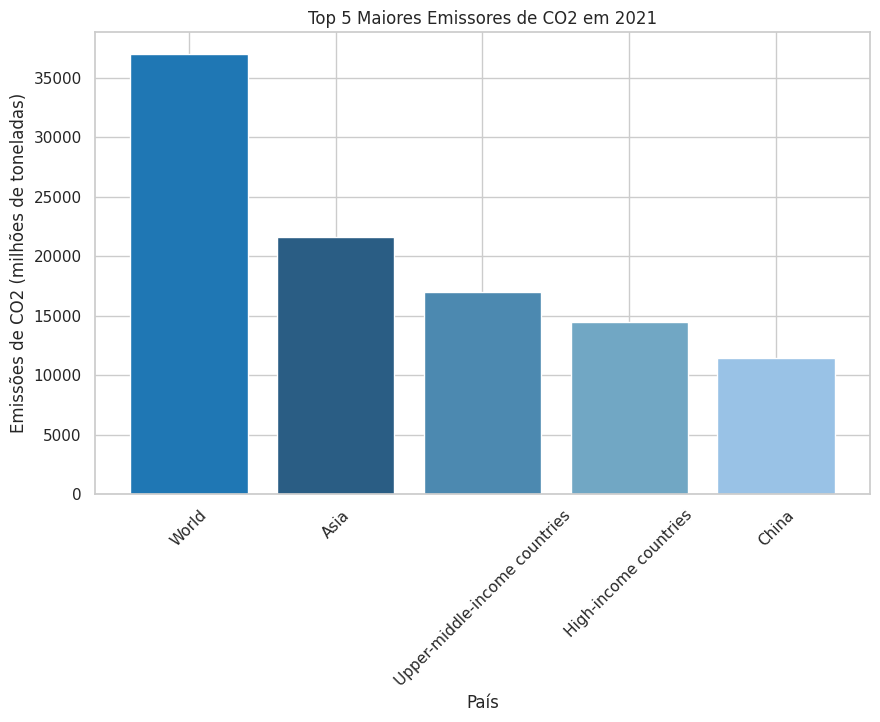

In [38]:
# Filtrar os dados para o ano de 2021
df_2021 = data[data['year'] == 2021]

# Selecionar os 5 países com as maiores emissões de CO2 em 2021
top_5_emissores = df_2021[['country', 'co2']].nlargest(5, 'co2')

# Plotar as emissões de CO2 dos 5 maiores emissores em 2021
plt.figure(figsize=(10, 6))

# Definir os tons de azul para as barras
blue_shades = ['#1f77b4', '#2a5d84', '#4c89b0', '#71a7c4', '#99c2e6']

# Criar o gráfico de barras
plt.bar(top_5_emissores['country'], top_5_emissores['co2'], color=blue_shades)
plt.title('Top 5 Maiores Emissores de CO2 em 2021')
plt.xlabel('País')
plt.ylabel('Emissões de CO2 (milhões de toneladas)')
plt.xticks(rotation=45)
plt.show()

### **Considerações Finais**

Ao longo deste projeto, buscamos entender e analisar as emissões de CO2 no Brasil, utilizando o dataset global da Our World in Data (OWID). O objetivo foi não só observar como as emissões têm evoluído ao longo dos anos, mas também projetar como elas poderão se comportar nos próximos 5 anos. Essa análise não só contribui para entender o impacto ambiental no Brasil, mas também oferece uma perspectiva sobre o que pode ser feito para enfrentar desafios climáticos.

O que encontramos foi uma jornada interessante e cheia de aprendizados:

1. **Evolução das Emissões no Brasil:** A análise das emissões de CO2 no Brasil ao longo do tempo mostrou como as emissões aumentaram ou diminuíram em resposta a diferentes momentos econômicos e políticos. A cada dado, ficou claro o quanto o Brasil está envolvido nas questões ambientais, sendo essencial monitorar esse comportamento para evitar impactos negativos ao meio ambiente no futuro.

2. **Comparação Internacional:** Ao comparar as emissões do Brasil com outros países, conseguimos observar a posição do nosso país no cenário global. Apesar de o Brasil ter um número total significativo de emissões, a comparação per capita nos mostrou que, em termos relativos, estamos em uma posição melhor em relação a países com maior desenvolvimento industrial. Isso indica que, embora haja desafios, o Brasil possui um potencial considerável para um uso mais sustentável de suas energias.

3. **Projeções para o Futuro:** Usamos modelos preditivos para projetar como as emissões de CO2 no Brasil poderiam se comportar até 2030. Os resultados indicam um crescimento moderado, mas sabemos que muitas variáveis podem alterar esse caminho. Políticas públicas eficientes e investimentos em novas tecnologias podem, sem dúvida, ajudar a conter esse crescimento.

4. **A Necessidade de Sustentabilidade:** A análise deixou claro que, se o Brasil não tomar ações concretas para reduzir suas emissões, o impacto ambiental poderá ser ainda maior. No entanto, também vimos que o Brasil tem uma grande oportunidade de liderar soluções sustentáveis, principalmente devido à sua grande diversidade e recursos naturais.

5. **Limitações do Estudo:** Vale lembrar que, como qualquer modelo preditivo, as projeções que fizemos se baseiam em dados históricos e assumem um crescimento linear. Fatores imprevistos, como crises econômicas, mudanças tecnológicas ou novas políticas públicas, podem alterar essas tendências de maneira significativa.

### **Conclusão**

Este projeto foi uma experiência valiosa para entender melhor como os dados podem nos ajudar a tomar decisões mais informadas sobre questões ambientais tão urgentes. Ao analisar as emissões de CO2, não só conseguimos enxergar o cenário atual, mas também projetar possíveis cenários para o futuro. O uso de dados desse tipo é fundamental para formuladores de políticas públicas e empresas que buscam formas de reduzir seu impacto no meio ambiente e alcançar um futuro mais sustentável.